In [3]:
#imports
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

import numpy as np
import matplotlib.pyplot as plt

In [6]:
# plot_history function
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    print(history.keys())
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

In [16]:
# load data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

# make input data noisy
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [13]:
# create the model

input_layer = Input(shape=(784,))
encode = Dense(64, activation='relu')(input_layer)
bottle_neck = Dense(32, activation='relu')(encode)
decode = Dense(64, activation='relu')(bottle_neck)
output_layer = Dense(784, activation='relu')(decode)

denoiser = Model(input_layer, output_layer)
denoiser.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
denoiser.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 784)               50960     
Total params: 105,392
Trainable params: 105,392
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
375/375 [==============================] - 1s 4ms/step - loss: 649.5361 - accuracy: 0.0103 - val_loss: 614.5435 - val_accuracy: 0.0158
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 613.4623 - accuracy: 0.0120 - val_loss: 601.5822 - val_accuracy: 0.0088
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 601.2624 - accuracy: 0.0092 - val_loss: 593.9512 - val_accuracy: 0.0090
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 598.2676 - accuracy: 0.0103 - val_loss: 586.6674 - val_accuracy: 0.0107
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 590.7374 - accuracy: 0.0092 - val_loss: 587.1627 - val_accuracy: 0.0079
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 588.2872 - accuracy: 0.0089 - val_loss: 582.5971 - val_accuracy: 0.0133
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 588.1735 - accuracy: 0.0122 - val_loss: 580.7058 -

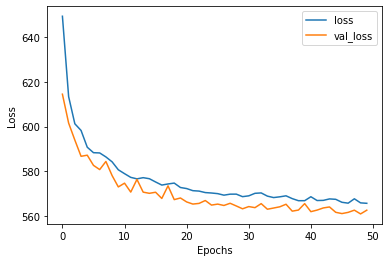

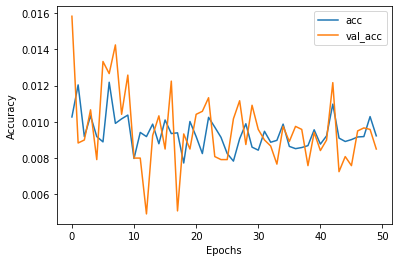

In [17]:
# fit the model
network_history = denoiser.fit(x_train_noisy, x_train, batch_size=128, epochs=50, validation_split=0.2)
plot_history(network_history)

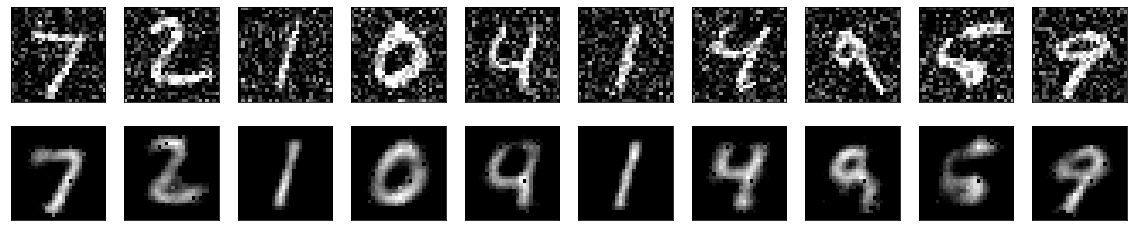

In [19]:
# test the model
predicted_imgs = denoiser.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()